# Create Fake Loan Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
pay_num = 4000
default_num = 1000

In [ ]:
                  #|FICO|   LTV     age|
pay_mean = np.array([650,   1.05,    42])
pay_cov = np.array([[10000, -6,  140],
                    [-6,    0.04,  -0.112],
                    [140,   -0.112, 49]])

default_mean = np.array([550,   1.15,   39])
default_cov = np.array([[5625,  0.75,   45],
                        [0.75,  0.04,   -0.036],
                        [45,    -0.036, 36]])


In [ ]:
default_data = np.append(np.random.multivariate_normal(default_mean,default_cov,default_num),np.ones((default_num,1)),axis=1)
pay_data = np.append(np.random.multivariate_normal(pay_mean,pay_cov,pay_num),np.zeros((pay_num,1)), axis=1)

In [ ]:
df = pd.DataFrame(np.vstack((default_data,pay_data)))
df.columns = ('fico','ltv','age','default')
df = shuffle(df).reset_index(drop=True)

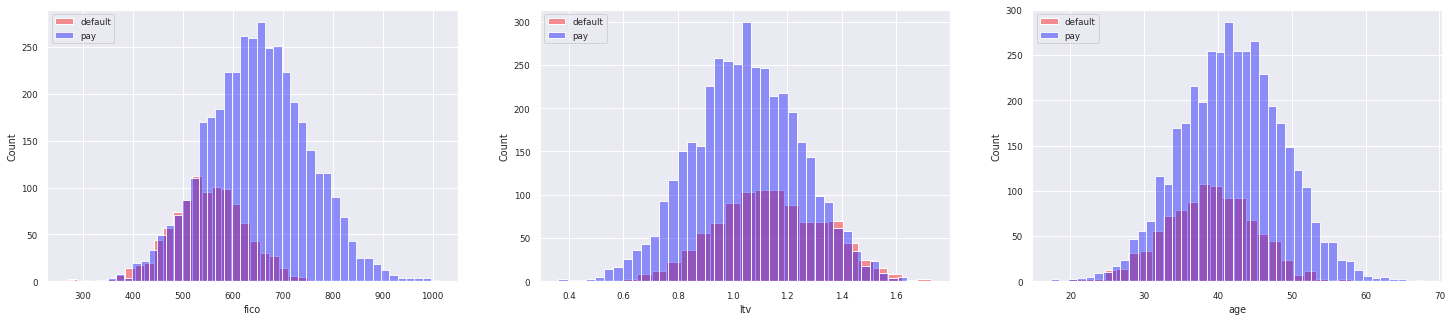

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
sns.histplot(df.fico[df.default==1],color='red',alpha=0.4,ax=ax[0],label='default')
sns.histplot(df.fico[df.default==0],color='blue',alpha=0.4,ax=ax[0],label='pay')
ax[0].legend(loc='upper left')
sns.histplot(df.ltv[df.default==1],color='red',alpha=0.4,ax=ax[1],label='default')
sns.histplot(df.ltv[df.default==0],color='blue',alpha=0.4,ax=ax[1],label='pay')
ax[1].legend(loc='upper left')
sns.histplot(df.age[df.default==1],color='red',alpha=0.4,ax=ax[2],label='default')
sns.histplot(df.age[df.default==0],color='blue',alpha=0.4,ax=ax[2],label='pay')
ax[2].legend(loc='upper left')
plt.show()

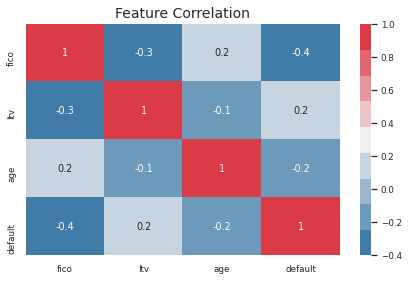

In [ ]:
#correlation of inputs and output
corr = df.corr().round(1)
sns.set(font_scale=0.8)
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(corr, annot=True, cmap=cmap,
        xticklabels=df.columns.values,
        yticklabels=df.columns.values)
plt.title('Feature Correlation', fontsize=14)
plt.tight_layout()

In [ ]:
train, test = train_test_split(df, test_size=1/5,stratify=df.default,random_state=0)

In [ ]:
print(len(train[train.default==1])/len(train))
print(len(train))

0.2
4000


In [ ]:
print(len(test[test.default==1])/len(test))
print(len(test))

0.2
1000


In [ ]:
#export data
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
loc = '/content/drive/Shared drives/AM207 - CLUE Final Project/Dataset/FakeLoan_3var/'
train.to_csv(loc + 'fakeloan_3var_train.csv', index=False)
test.to_csv(loc + 'fakeloan_3var_test.csv', index=False)